In [3]:
% load_ext autoreload
% autoreload 2
import os

if not os.getcwd().endswith('mob2crime'):
    os.chdir('..')
os.getcwd()

'/home/Jiahui/mob2crime'

In [4]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from copy import copy
import bisect
from src.utils import loubar_thres 

In [5]:
arr = np.random.beta(2,200,1000)
arr.sort()
# arr

In [6]:
mean = arr.mean()
mean_idx = bisect.bisect(arr, arr.mean())
mean_pos = mean_idx/arr.size
mean, mean_pos, mean_idx

(0.010367958738706594, 0.583, 583)

In [16]:
lonrenz_y = arr.cumsum() / arr.sum()
lonrenz_y = np.insert(lonrenz_y, 0, 0) 
# x_axis = np.arange(lonrenz_y.size)/(lonrenz_y.size-1)

# slope = (lonrenz_y[-1] - lonrenz_y[-2])/(x_axis[-1]-x_axis[-2])
# loubar = (slope-1)/slope

# thres_idx = int(np.ceil((lonrenz_y.size-1)*loubar))-1
# arr_thres = arr[thres_idx]

# arr_thres, loubar, thres_idx

In [11]:
loubar, arr_thres = loubar_thres(arr,is_sorted=True)
loubar, arr_thres

(0.76151488693012737, 0.014111071896804083)

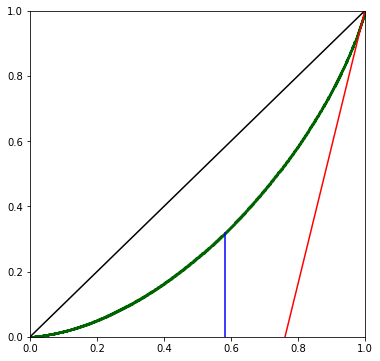

In [17]:
fig, ax = plt.subplots(figsize=[6,6])
plt.ylim(0,1)
plt.xlim(0,1)
## scatter plot of Lorenz curve
ax.scatter(np.arange(lonrenz_y.size)/(lonrenz_y.size-1), lonrenz_y, marker='x', color='darkgreen', s=3)
## line plot of equality
ax.plot([0,1], [0,1], color='k')
ax.plot([loubar, 1], [0, 1], color='r')
ax.plot([mean_pos, mean_pos], [0, lonrenz_y[mean_idx]], color='blue')